In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
video_games = pd.read_csv('games.csv')
video_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
video_games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [26]:
video_games = video_games[['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags']]
video_games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [27]:
video_games.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers                     object
Publishers                     object
Categories                     object
Genres                         object
Tags        

In [79]:
video_games = video_games[video_games['Peak CCU'] > 0]
video_games

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip..."
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,1,True,False,...,0,0,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm..."
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,True,False,...,0,0,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,True,False,...,0,0,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer..."
10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,True,False,...,427,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74668,2404920,Lonely Path,"Jun 8, 2023",0 - 20000,1,0,5.99,0,True,True,...,0,0,0,0,0,Gilded Rune Games,Gilded Rune Games,"Single-player,Steam Achievements,Steam Worksho...","Casual,Indie","Casual,Puzzle,2D,Logic,Relaxing,Nature,Singlep..."
74677,2436330,Dickland: Horror Quest,"Jun 6, 2023",0 - 20000,1,0,0.59,0,True,False,...,0,0,0,0,0,Piece Of Voxel,Piece Of Voxel,"Single-player,Steam Achievements","Adventure,Indie",NaN
74678,2341800,Magic and Machines,"Jun 9, 2023",100000 - 200000,1,0,2.99,0,True,True,...,0,0,0,0,0,Little Bear Studios,Little Bear Studios,"Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Casual,Indie,RPG,Strategy","RPG,JRPG,Turn-Based Combat,Retro,Pixel Graphic..."
74684,2399450,Frosthaven: Official Companion,"Jun 5, 2023",0 - 20000,1,0,7.99,0,True,True,...,0,0,0,0,0,Lucky Duck Games,Lucky Duck Games,"Single-player,Multi-player,Co-op,Online Co-op",Adventure,NaN


In [83]:
Price = video_games['Price']
Owners = video_games['Average playtime forever']
correlation = st.pearsonr(Price, Owners)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.08


In [5]:
video_games.sort_values(by='Peak CCU', ascending=False).head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
69429,990080,Hogwarts Legacy,"Feb 10, 2023",5000000 - 10000000,872138,0,59.99,1,True,False,...,55658,661,661,501,501,Avalanche Software,Warner Bros. Games,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","Magic,Fantasy,Open World,Adventure,Singleplaye..."
46158,730,Counter-Strike: Global Offensive,"Aug 21, 2012",50000000 - 100000000,825215,0,0.00,1,True,True,...,3441592,30484,777,6357,253,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea..."
17585,570,Dota 2,"Jul 9, 2013",100000000 - 200000000,558759,0,0.00,2,True,True,...,14300,37162,1647,880,749,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport..."
70064,1326470,Sons Of The Forest,"Feb 23, 2023",2000000 - 5000000,405191,0,29.99,0,True,False,...,49027,312,312,238,238,Endnight Games Ltd,Newnight,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,Simulation,Early Access","Survival Horror,Multiplayer,Open World,Surviva..."
47658,1599340,Lost Ark,"Feb 11, 2022",20000000 - 50000000,287501,17,0.00,4,True,False,...,59685,3335,2033,836,1318,Smilegate RPG,Amazon Games,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Action,Adventure,Free to Play,Massively Multip...","MMORPG,Free to Play,Action RPG,RPG,Hack and Sl..."


In [84]:
oneshot_df = video_games['Genres'].str.split(",").str.join('|').str.get_dummies()
oneshot_df.head()

,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,...,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
5,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
video_games_full = video_games.join(oneshot_df)
video_games_full.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,True,False,...,0,0,0,0,0,1,0,0,0,0
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,1,True,False,...,0,0,0,0,0,1,0,0,0,0
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,True,False,...,0,0,1,0,0,1,0,0,0,0
10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0


In [99]:
F2p = video_games_full.groupby('Free to Play')['Peak CCU'].mean()
Adventure = video_games_full.groupby('Adventure')['Peak CCU'].mean()
Action = video_games_full.groupby('Action')['Peak CCU'].mean()
Sports = video_games_full.groupby('Sports')['Peak CCU'].mean()
Strategy = video_games_full.groupby('Strategy')['Peak CCU'].mean()
RPG = video_games_full.groupby('RPG')['Peak CCU'].mean()
Accounting = video_games_full.groupby('Accounting')['Peak CCU'].mean()
Animation = video_games_full.groupby('Animation & Modeling')['Peak CCU'].mean()
Audio = video_games_full.groupby('Audio Production')['Peak CCU'].mean()
Casual = video_games_full.groupby('Casual')['Peak CCU'].mean()
Design = video_games_full.groupby('Design & Illustration')['Peak CCU'].mean()
Early_Access = video_games_full.groupby('Early Access')['Peak CCU'].mean()
Education = video_games_full.groupby('Education')['Peak CCU'].mean()
Game_Development = video_games_full.groupby('Game Development')['Peak CCU'].mean()
Gore = video_games_full.groupby('Gore')['Peak CCU'].mean()
Indie = video_games_full.groupby('Indie')['Peak CCU'].mean()
Multi = video_games_full.groupby('Massively Multiplayer')['Peak CCU'].mean()
Movie = video_games_full.groupby('Movie')['Peak CCU'].mean()
Nudity = video_games_full.groupby('Nudity')['Peak CCU'].mean()
Photo = video_games_full.groupby('Photo Editing')['Peak CCU'].mean()
Racing = video_games_full.groupby('Racing')['Peak CCU'].mean()
Content = video_games_full.groupby('Sexual Content')['Peak CCU'].mean()
Simulation = video_games_full.groupby('Simulation')['Peak CCU'].mean()
Training = video_games_full.groupby('Software Training')['Peak CCU'].mean()
Utilities = video_games_full.groupby('Utilities')['Peak CCU'].mean()
Production = video_games_full.groupby('Video Production')['Peak CCU'].mean()
Violent = video_games_full.groupby('Violent')['Peak CCU'].mean()
Web = video_games_full.groupby('Web Publishing')['Peak CCU'].mean()

In [115]:
ratings = pd.DataFrame({"Accounting": Accounting, "Adventure": Adventure, "Action": Action, 
                        "Animation": Animation, "Audio Production": Audio, "Casual": Casual,
                        "Design&Illustration": Design, "Early Access": Early_Access, "Education": Education,
                        "Free to Play": F2p, "Game Development": Game_Development, "Gore": Gore, "Indie": Indie,
                        "Multiplayer": Multi, "Movie": Movie, "Nudity": Nudity, "Photo Editing": Photo,
                        "RPG":RPG, "Racing": Racing, "Sexual Content": Content, "Simulation": Simulation, 
                        "Software": Training, "Sports": Sports, "Strategy": Strategy, 
                        "Utilities": Utilities, "Video Production": Production, "Violent": Violent, "Web Publishing": Web})
ratings

,Accounting,Adventure,Action,Animation,Audio Production,Casual,Design&Illustration,Early Access,Education,Free to Play,...,Racing,Sexual Content,Simulation,Software,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing
0,513.629175,457.647097,222.537251,511.671146,514.354394,719.839364,512.976736,511.565584,514.825847,393.109397,...,523.765615,513.980612,520.009489,514.614704,509.125764,537.163579,513.891844,514.990982,514.824328,514.461383
1,7.500000,599.189401,995.402709,778.178082,278.552239,117.859433,579.053763,529.031476,104.967742,2155.136298,...,232.074438,2.875000,493.243365,123.759259,609.134361,435.567293,490.307407,218.309278,7.220000,139.875000


In [107]:
len(ratings.columns)

28

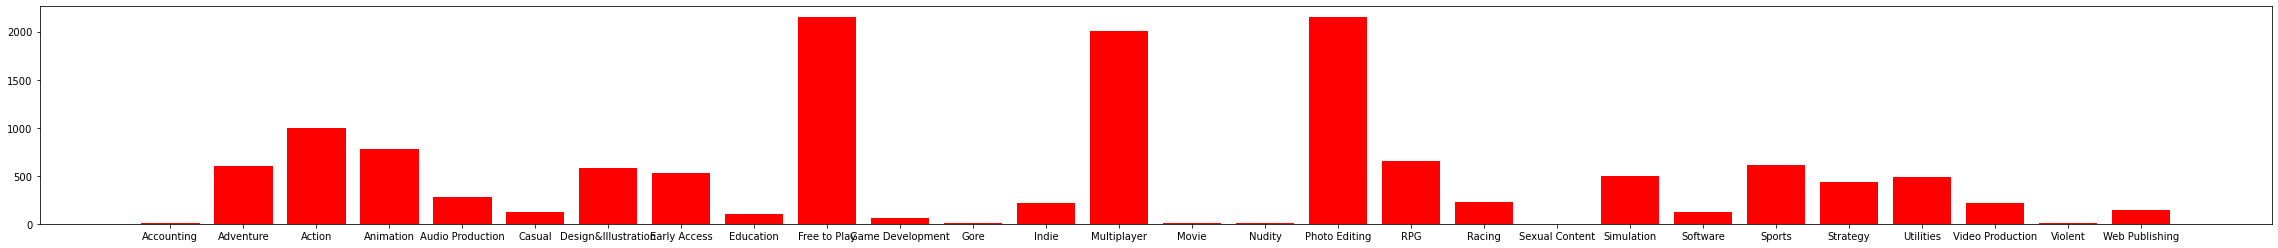

In [119]:
x_axis = np.arange(len(ratings.columns))
y_axis = ratings.iloc[1,:]
tick_locations = [value for value in x_axis]
plt.figure(figsize=(40,4))
plt.xticks(tick_locations, ratings.columns)
plt.bar(x_axis, y_axis, color = 'r', align='center')
plt.show()

In [93]:
video_games_full.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'Windows', 'Mac', 'Linux',
       'Metacritic score', 'User score', 'Positive', 'Negative', 'Score rank',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Publishers', 'Categories',
       'Genres', 'Tags', 'Accounting', 'Action', 'Adventure',
       'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Early Access', 'Education', 'Free to Play',
       'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie',
       'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Violent', 'Web Publishing'],
      dtype='object')